In [1]:
from land_cover import load
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from libpysal.weights import KNN, DistanceBand
from esda.moran import Moran
from splot.esda import moran_scatterplot
import contextily
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
def analyze_moran(gdf, w, variable):
    # Compute Moran's I
    y = gdf[variable].values
    moran = Moran(y, w)

    # Print Moran's I results
    print(f"Moran's I: {moran.I}")
    print(f"p-value: {moran.p_sim}")
    print(f"z-score: {moran.z_sim}")

    # Moran scatter plot
    fig, ax = moran_scatterplot(moran,
                                aspect_equal=True)
    plt.title(f"Moran's I Scatter Plot for {variable}")
    plt.show()

In [7]:
gdf = load.loadEfflux()

# Assume 'gdf' is your GeoDataFrame and 'your_variable' is the column you're analyzing
variable = 'AvgOfpCO2'
# variable = 'AvgOfTempC'

# gdf = gdf.to_crs('EPSG:3857')
gdf = gdf.to_crs('ESRI:102001')

gdf.head()

,ID,Lat_DD,Lon_DD,AvgOfTempC,AvgOfpH,AvgOfALKum,AvgOfCO2_o,StDevOfCO2,AvgOfpCO2,StDevOfpCO,EID,geometry
0,15031700,58.168286,-133.726735,5.00,6.70,119.88,78.780219,0.000000,1234.682567,0.000000,e0,POINT (-2076885.119 2611259.148)
1,15051000,58.341619,-134.403160,1.50,7.20,319.68,75.041211,20.143512,1025.733067,249.206896,e1,POINT (-2099426.634 2648800.793)
2,15056120,59.468840,-135.299331,5.50,6.30,319.68,520.969456,0.000000,8315.749472,0.000000,e2,POINT (-2072436.888 2783286.581)
3,15056310,59.224951,-135.447940,12.25,6.60,849.15,582.689855,205.993601,11276.942548,795.016390,e3,POINT (-2094628.203 2764928.865)
4,15057860,55.102713,-131.565289,10.50,6.75,309.69,163.063331,44.072168,3025.846654,105.243959,e4,POINT (-2144103.901 2247973.863)


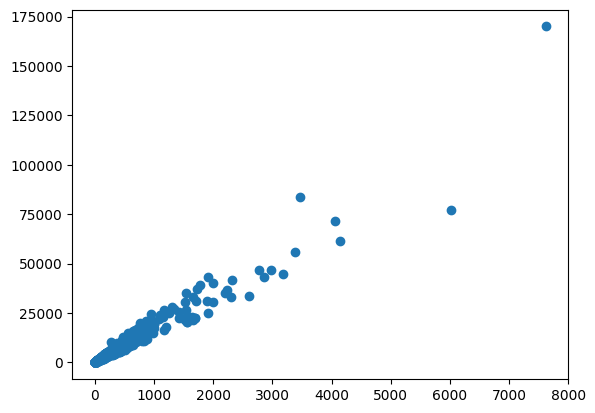

In [126]:
## Compare CO2 in mmols/ kg C water
plt.scatter(gdf['AvgOfCO2_o'], gdf['AvgOfpCO2'])

# Exploratory analysis

In [116]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          891 non-null    object  
 1   Lat_DD      891 non-null    float64 
 2   Lon_DD      891 non-null    float64 
 3   AvgOfTempC  891 non-null    float64 
 4   AvgOfpH     891 non-null    float64 
 5   AvgOfALKum  891 non-null    float64 
 6   AvgOfCO2_o  891 non-null    float64 
 7   StDevOfCO2  891 non-null    float64 
 8   AvgOfpCO2   891 non-null    float64 
 9   StDevOfpCO  891 non-null    float64 
 10  EID         891 non-null    object  
 11  geometry    891 non-null    geometry
dtypes: float64(9), geometry(1), object(2)
memory usage: 83.7+ KB


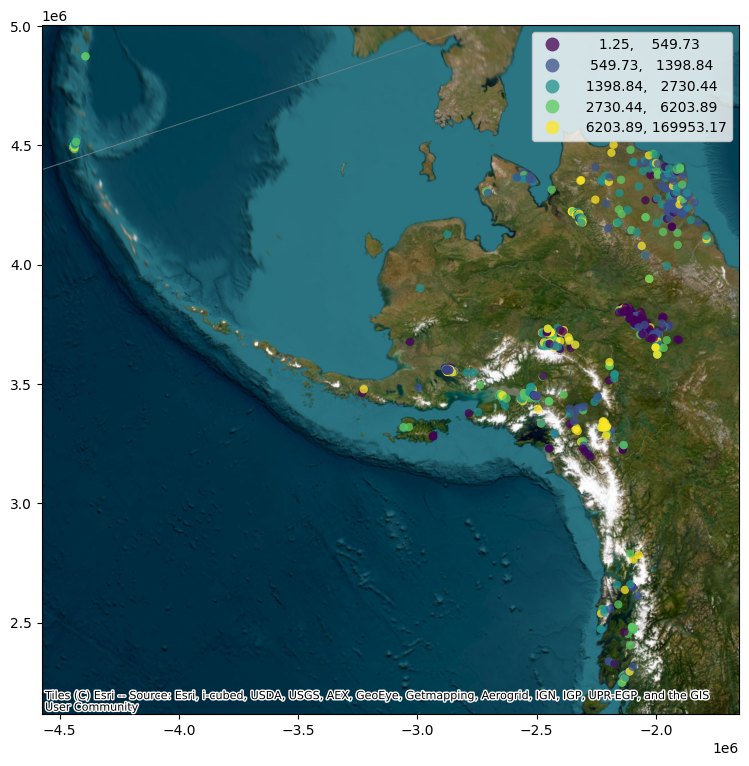

In [12]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf.plot(
    column=variable,
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    # legend_kwds={"loc": 2},
    ax=ax,
)
contextily.add_basemap(
    ax,
    crs=gdf.crs,
    source=contextily.providers.Esri.WorldImagery,
    zoom=5
)
# ax.set_axis_off()
# ax.set_xlim([-2.e7, -1.4e7]) # in web mercator
# ax.set_ylim([ymin, ymax])

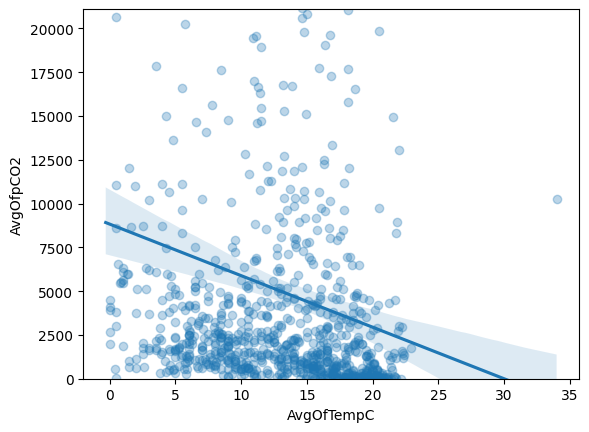

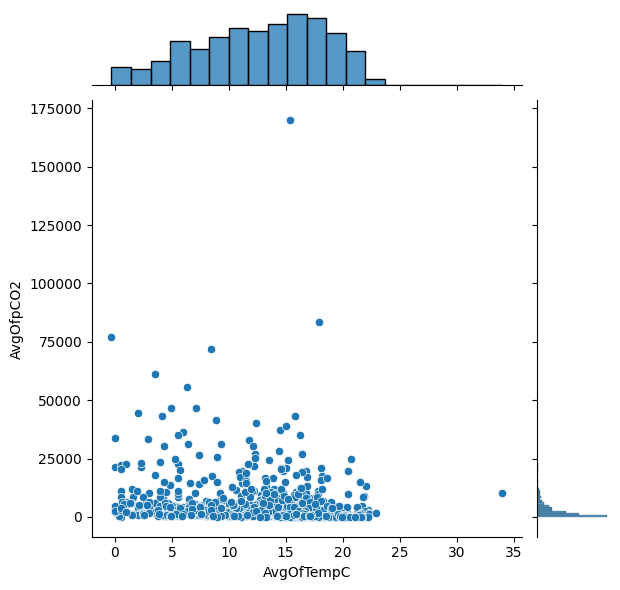

In [118]:
fig, ax = plt.subplots(1, 1)
sns.regplot(gdf, x='AvgOfTempC', y='AvgOfpCO2', ax=ax, scatter_kws={'alpha':0.3})
ax.set_ylim([0, np.quantile(gdf.AvgOfpCO2, 0.95)])
sns.jointplot(gdf, x='AvgOfTempC', y='AvgOfpCO2')

# Moran's I

In [114]:
# Create spatial weights matrix 
# w = KNN.from_dataframe(gdf, k=8)
w = DistanceBand(gdf[['Lat_DD',	'Lon_DD']], 1., binary=False) # not projected, one degree max leads to islands

# Standardize the weights matrix
w.transform = 'R'

('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 190, ' is an island (no neighbors)')
('WARNING: ', 211, ' is an island (no neighbors)')
('WARNING: ', 244, ' is an island (no neighbors)')
('WARNING: ', 270, ' is an island (no neighbors)')


/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 31 disconnected components.
 There are 8 islands with ids: 83, 85, 88, 110, 190, 211, 244, 270.
  w = W(neighbors, weights, ids, **kwargs)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 31 disconnected components.
 There are 8 islands with ids: 83, 85, 88, 110, 190, 211, 244, 270.
  W.__init__(


In [ ]:
w.weights
# np.any([0.125 not in weights for weights in w.weights.values()])

{0: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 1: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 2: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 3: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 4: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 5: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 6: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 7: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 8: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 9: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 10: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 11: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 12: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 13: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 14: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 15: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 1

In [65]:
DistanceBand?

Init signature:
DistanceBand(
    data,
    threshold,
    p=2,
    alpha=-1.0,
    binary=True,
    ids=None,
    build_sp=True,
    silence_warnings=False,
    distance_metric='euclidean',
    radius=None,
)
Docstring:     
Spatial weights based on distance band.

Parameters
----------
data        : array
              (n,k) or KDTree where KDtree.data is array (n,k)
              n observations on k characteristics used to measure
              distances between the n objects
threshold  : float
             distance band
p          : float
             DEPRECATED: use `distance_metric`
             Minkowski p-norm distance metric parameter:
             1<=p<=infinity
             2: Euclidean distance
             1: Manhattan distance
binary     : boolean
             If true w_{ij}=1 if d_{i,j}<=threshold, otherwise w_{i,j}=0
             If false wij=dij^{alpha}
alpha      : float
             distance decay parameter for weight (default -1.0)
             if alpha is positive 

Moran's I: 0.12740182281253523
p-value: 0.003
z-score: 7.0157794926345485


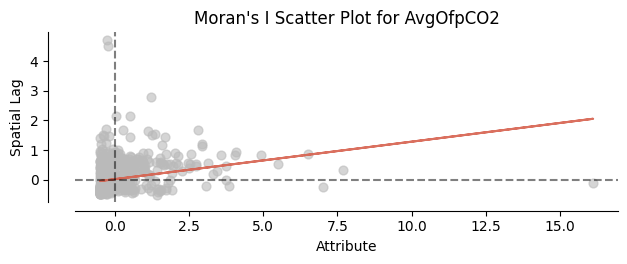

In [115]:
analyze_moran(gdf, w, variable)

Temperature is much more strongly auto-correlated

Moran's I: 0.5591077508332454
p-value: 0.001
z-score: 34.42891886136108


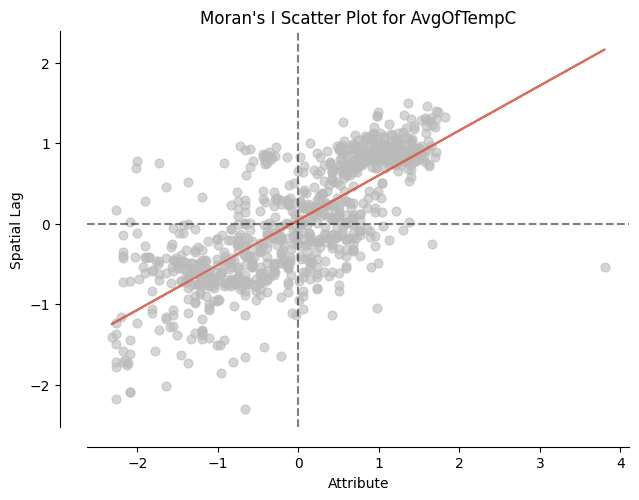

In [109]:
analyze_moran(gdf, w, 'AvgOfTempC')

## Moran's I for all vars

In [11]:
df = load.loadLandCoverJoined()
df.columns

Index(['Lake', 'Lat_DD', 'Lon_DD', 'AvgOfTempC', 'AvgOfpH', 'AvgOfALKum',
       'AvgOfpCO2', 'StDevOfpCO', 'Name', 'Reference', 'mean_bound',
       'max_bound_', 'Area_m2', 'Perim_m2', 'Total_inun_2014',
       'Trees_pct_2014', 'Shrubs_pct_2014', 'Wetlands_pct_2014',
       'Graminoid_pct_2014', 'Sparse_pct_2014', 'Littorals_pct_2014',
       'Littoral_wetland_pct_2014', 'Total_inun_RSD', 'Total_inun_dyn_pct',
       'Hi_water_yr', 'Lo_water_yr', 'Dominant_veg_2014',
       'Dominant_veg_group_2014', 'SDF', 'Perim_area_ratio',
       'Total_inun_change', 'Total_inun_trend'],
      dtype='object')

In [12]:
# df = df.dropna()

In [13]:
load.sortColumns(df)
df.columns

Index(['AvgOfpCO2', 'Lat_DD', 'Lon_DD', 'Area_m2', 'Perim_m2', 'mean_bound',
       'max_bound_', 'Perim_area_ratio', 'SDF', 'AvgOfpH', 'AvgOfALKum',
       'AvgOfTempC', 'Lake', 'StDevOfpCO', 'Name', 'Reference',
       'Total_inun_2014', 'Trees_pct_2014', 'Shrubs_pct_2014',
       'Wetlands_pct_2014', 'Graminoid_pct_2014', 'Sparse_pct_2014',
       'Littorals_pct_2014', 'Littoral_wetland_pct_2014', 'Total_inun_RSD',
       'Total_inun_dyn_pct', 'Hi_water_yr', 'Lo_water_yr', 'Dominant_veg_2014',
       'Dominant_veg_group_2014', 'Total_inun_change', 'Total_inun_trend'],
      dtype='object')

In [33]:
w = DistanceBand(df[['Lat_DD',	'Lon_DD']], 2., binary=False) # not projected, one degree max leads to islands
w.transform = 'R'

('WARNING: ', 137, ' is an island (no neighbors)')
('WARNING: ', 424, ' is an island (no neighbors)')


/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 2 islands with ids: 137, 424.
  w = W(neighbors, weights, ids, **kwargs)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 2 islands with ids: 137, 424.
  W.__init__(


In [21]:
morans=pd.DataFrame({'var': [], 'I': [], 'p': []})

for i, var in enumerate(load.dropColumns(df).columns):
    y = df[var].dropna().values # TODO: drop nans indiv for each var, record n in bar plot or in semivarios
    w = DistanceBand(df.dropna(subset=var)[['Lat_DD',	'Lon_DD']], 10., binary=False) # not projected, one degree max leads to islands
    w.transform = 'R'
    moran = Moran(y, w)
    morans.loc[i, 'var'] = var
    morans.loc[i, 'I'] = moran.I
    morans.loc[i, 'p'] = moran.p_sim


/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_55506/2132919159.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'AvgOfpCO2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  morans.loc[i, 'var'] = var
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_da

In [22]:
morans

,var,I,p
0,AvgOfpCO2,0.070656,0.037
1,Area_m2,0.007981,0.051
2,Perim_m2,0.024168,0.031
3,mean_bound,0.187661,0.003
4,max_bound_,0.138269,0.006
5,Perim_area_ratio,0.370752,0.001
6,SDF,0.339356,0.001
7,AvgOfpH,0.451155,0.001
8,AvgOfALKum,0.338497,0.001
9,AvgOfTempC,0.369687,0.001


<Axes: xlabel='var'>

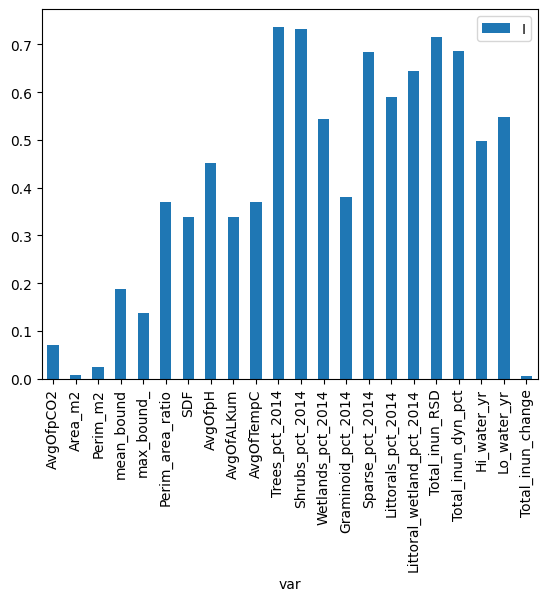

In [23]:
morans.plot.bar(y='I', x='var')

('WARNING: ', 137, ' is an island (no neighbors)')
Moran's I: 0.5168118604755579
p-value: 0.001
z-score: 21.724543832780174


/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 137.
  w = W(neighbors, weights, ids, **kwargs)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 137.
  W.__init__(


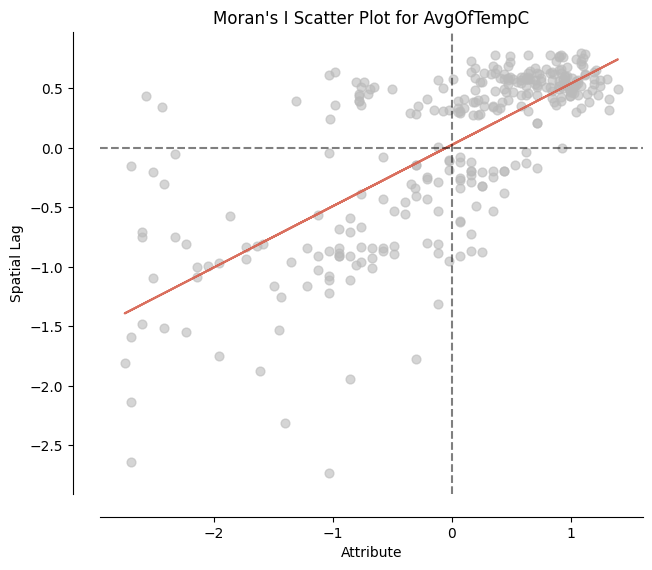

In [ ]:
# See what Moran's looks like with nans removed
w = DistanceBand(df.dropna(subset='AvgOfTempC')[['Lat_DD',	'Lon_DD']], 2., binary=False) # not projected, one degree max leads to islands
w.transform = 'R'
analyze_moran(df.dropna(subset='AvgOfTempC'), w, 'AvgOfTempC')

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib

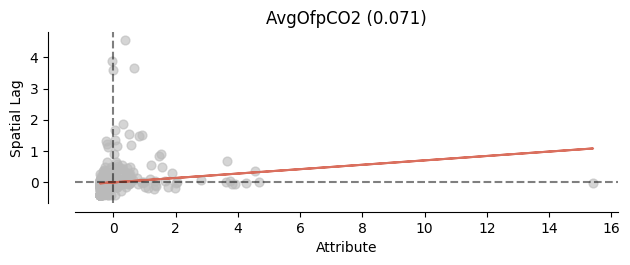

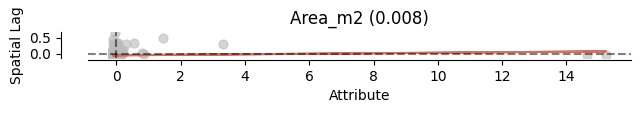

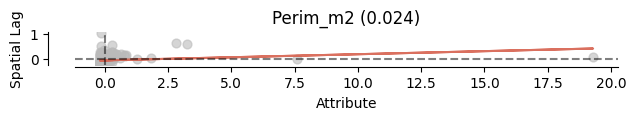

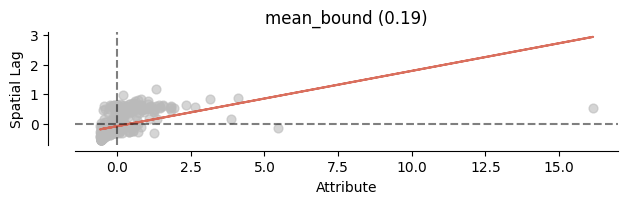

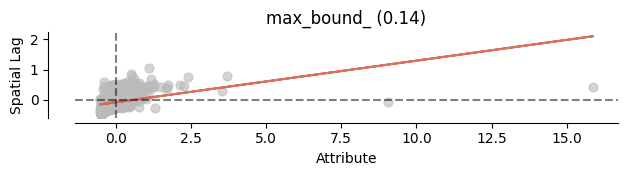

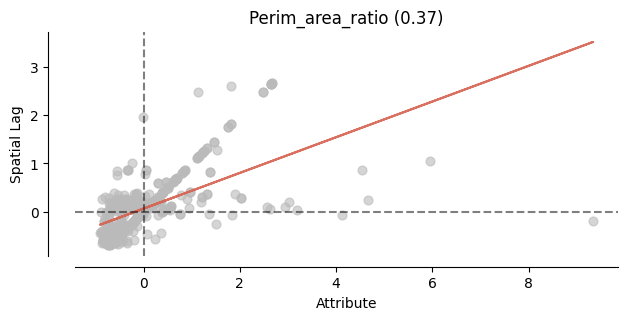

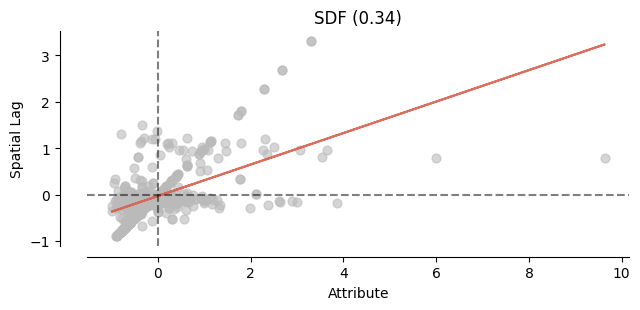

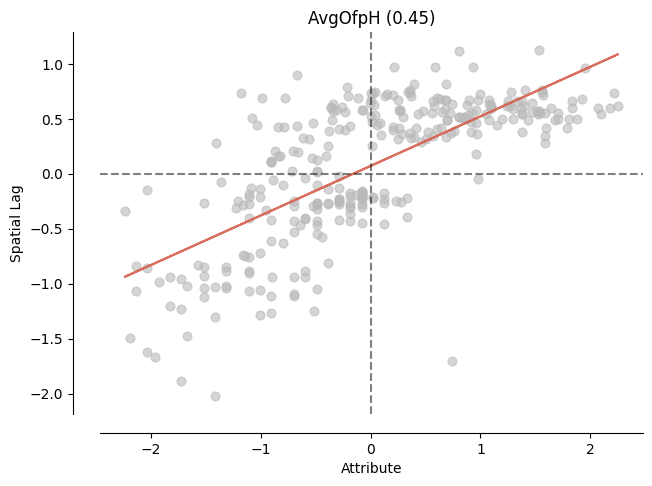

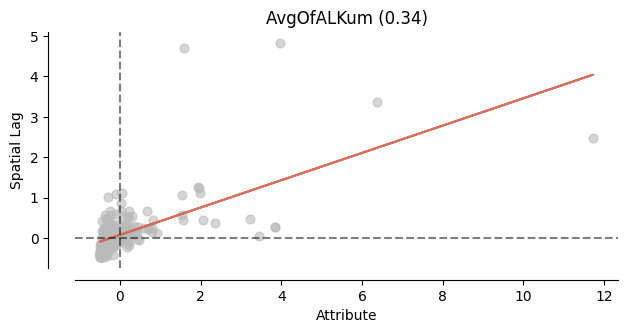

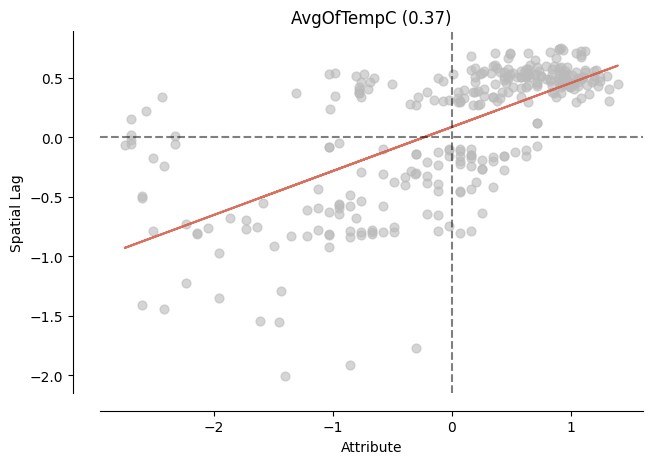

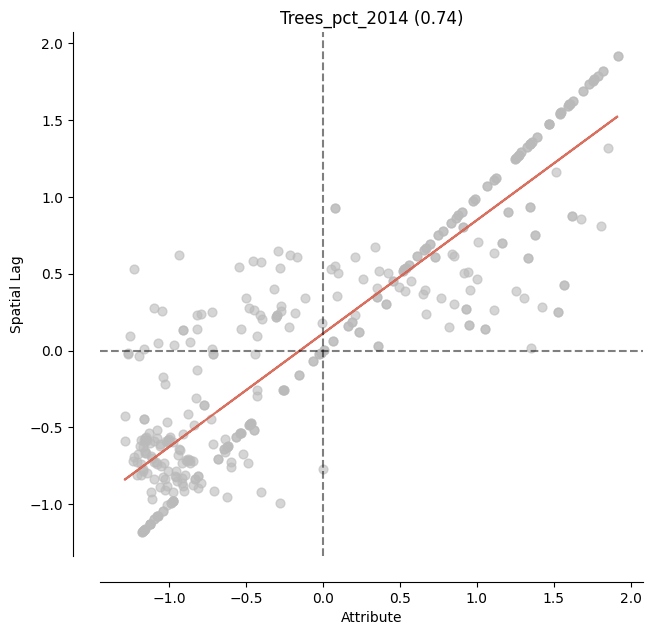

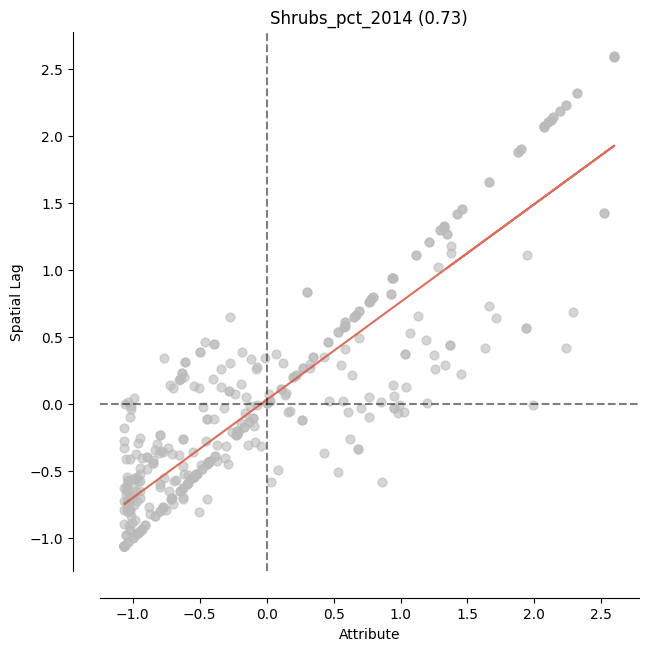

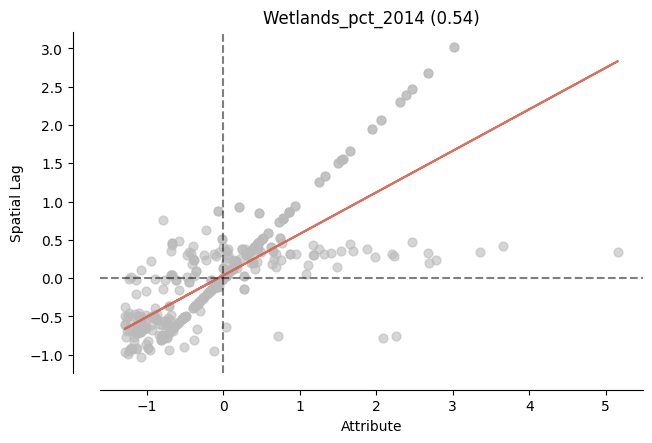

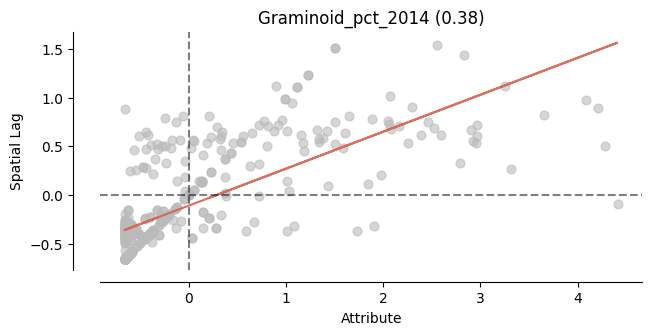

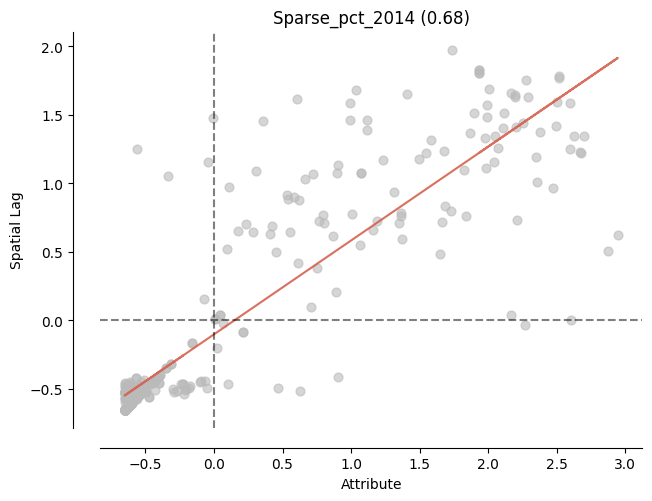

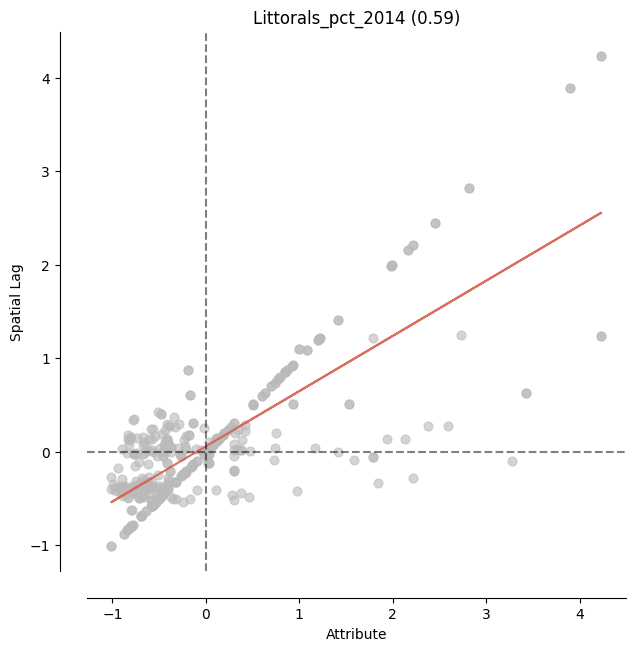

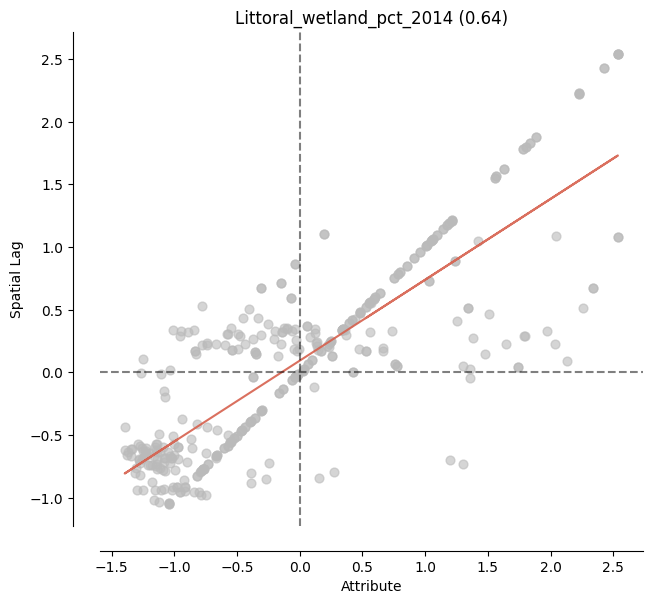

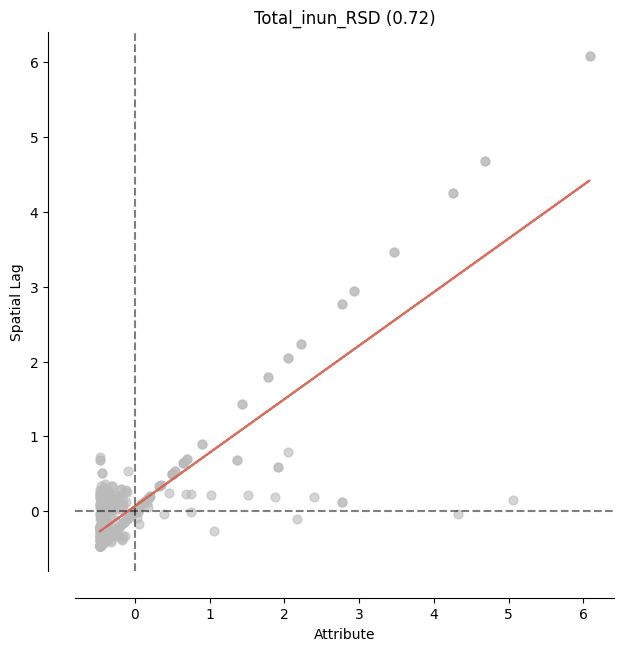

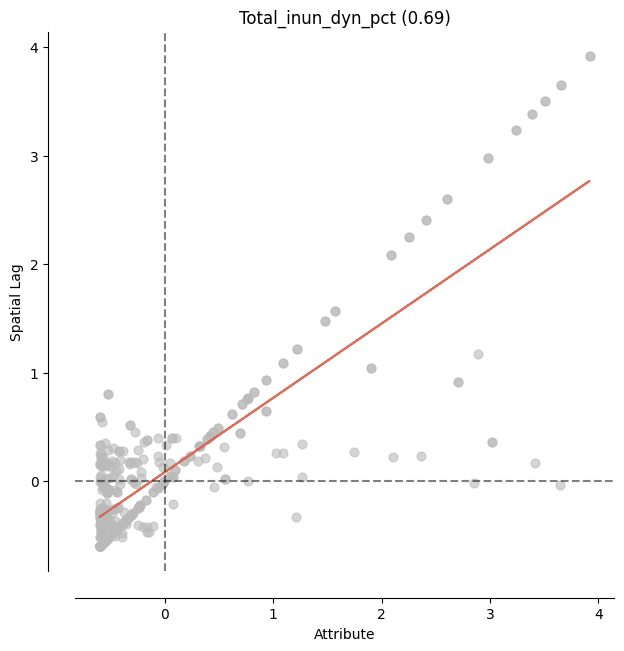

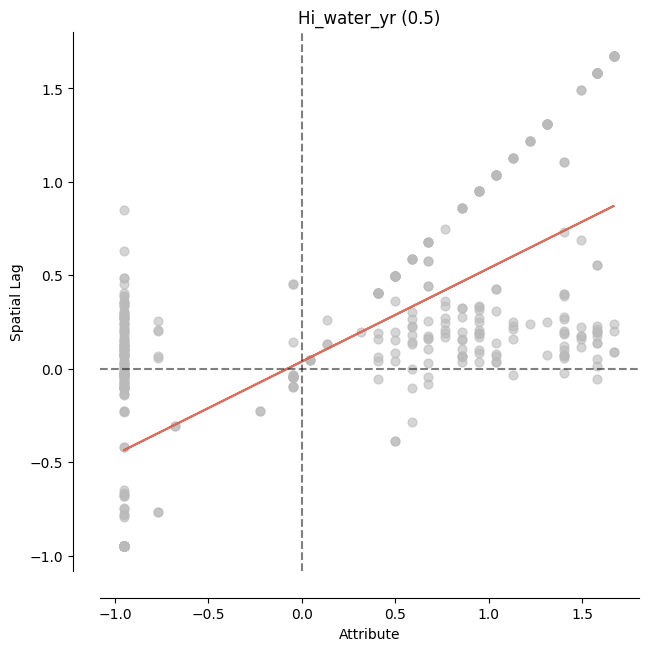

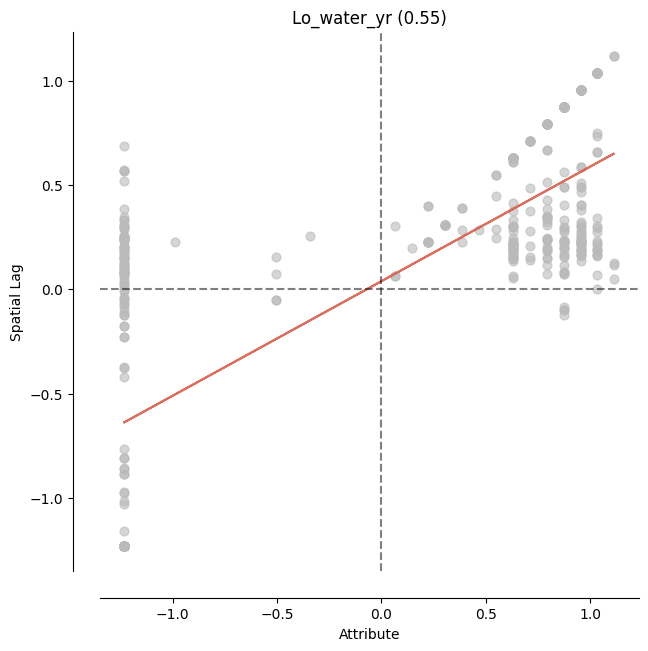

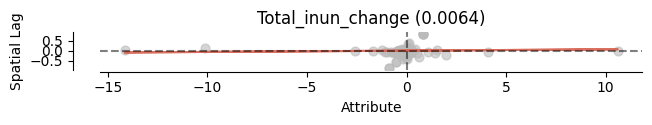

In [26]:
## Plots for each var
for i, var in enumerate(load.dropColumns(df).columns):
    y = df[var].dropna().values # TODO: drop nans indiv for each var, record n in bar plot or in semivarios
    w = DistanceBand(df.dropna(subset=var)[['Lat_DD',	'Lon_DD']], 10., binary=False) # not projected, one degree max leads to islands
    w.transform = 'R'
    moran = Moran(y, w)
    _, _ = moran_scatterplot(moran,
                                aspect_equal=True)
    plt.title(f"{var} ({moran.I:0.2})")